(-0.5, 926.5, 561.5, -0.5)

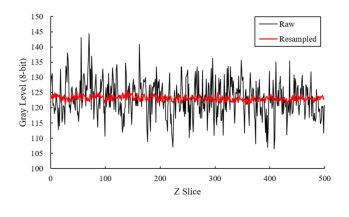

In [4]:
#We have a banding issue in the data set where the gray level of the background varies from z-slice to z-slice
#as shown below...we will resample the data to remove the noise 
import imageio as io
import matplotlib.pyplot as plt
plot_img = io.imread('E:/paper_2/resample_noise.png')
plt.imshow(plot_img)
plt.axis('off')

In [5]:
import matplotlib.pyplot as plt
import imageio as io
import numpy as np

vol = io.volread('E:/paper_2/Volumes_Bare/TiffSaver-tomo_B0X.tif')
refimage = vol.reshape(-1)
image = vol[2105]

def equalise_globalmax_1(image, refimage):
    refhist = np.histogram(refimage.astype('Float32'), bins=range(256))
    imghist = np.histogram(image.astype('Float32'), bins=range(256))
    diff = refhist[0].tolist().index(max(refhist[0])) - imghist[0].tolist().index(max(imghist[0]))                        
    resampled = image + diff
    return refhist, imghist, diff, resampled;

<ipython-input-5-9821962978e4>:10: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  refhist = np.histogram(refimage.astype('Float32'), bins=range(256))
<ipython-input-5-9821962978e4>:11: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  imghist = np.histogram(image.astype('Float32'), bins=range(256))


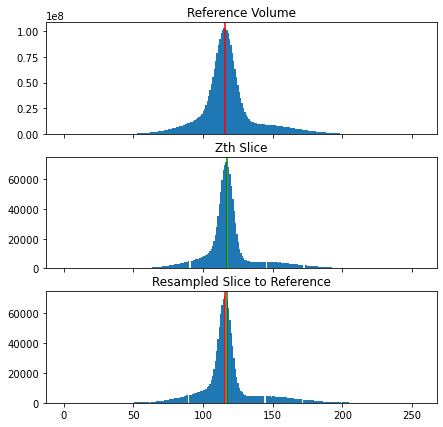

In [6]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize= (7, 7), sharex=True, sharey=False)
ax = axes.ravel()

refhist, imghist, diff, resampled = equalise_globalmax_1(image, refimage);

#ax[0].imshow(refimage, cmap=plt.cm.gray)
#ax[0].set_title('Reference')
#ax[0].axis('off')

ax[0].set_title('Reference Volume')
ax[0].hist(refimage.ravel(), bins=256)
ax[0].axvline(refhist[0].tolist().index(max(refhist[0])), color='r')
   
#ax[2].imshow(image, cmap=plt.cm.gray)
#ax[2].set_title('Original')
#ax[2].axis('off')
   
ax[1].set_title('Zth Slice')
ax[1].hist(image.ravel(), bins=256)
ax[1].axvline(imghist[0].tolist().index(max(imghist[0])), color='g')

#ax[4].imshow(resampled, cmap=plt.cm.gray)
#ax[4].set_title('Resampled')
#ax[4].axis('off')

ax[2].set_title('Resampled Slice to Reference')
ax[2].hist(resampled.ravel(), bins=256)
ax[2].axvline(refhist[0].tolist().index(max(refhist[0])), color='r')
ax[2].axvline(imghist[0].tolist().index(max(imghist[0])), color='g')

plt.show()

In [7]:
#okay now we will loop z-slice through the function to process the entire volume
refhist = np.histogram(refimage.astype('Float32'), bins=range(256))
global_max = refhist[0].tolist().index(max(refhist[0]))

def equalise_globalmax_2(image, global_max):
    imghist = np.histogram(image.astype('Float32'), bins=range(256))
    diff = global_max - imghist[0].tolist().index(max(imghist[0]))                        
    resampled = image + diff
    return resampled;

for z in range(2110):
    vol[z] = equalise_globalmax_2(vol[z], global_max)

io.volwrite('E:/paper_2/Volumes_Bare/TiffSaver-tomo_B0X.tif', vol, format='tiff')

<ipython-input-7-98ff0ead5bfc>:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  refhist = np.histogram(refimage.astype('Float32'), bins=range(256))
<ipython-input-7-98ff0ead5bfc>:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  imghist = np.histogram(image.astype('Float32'), bins=range(256))


In [10]:
#that worked nicely so now we apply this to the whole data set
for y in range(1, 17):
    vol = io.volread('E:/paper_2/Volumes_Bare/TiffSaver-tomo_B%d.tif'%(y))
    refimage = vol.reshape(-1)
    refhist = np.histogram(refimage.astype('Float32'), bins=range(256))
    global_max = refhist[0].tolist().index(max(refhist[0]))
    for z in range(2110):
        vol[z] = equalise_globalmax_2(vol[z], global_max)
    io.volwrite('E:/paper_2/Volumes_Bare/TiffSaver-tomo_B%d.tif'%(y), vol, format='tiff')

<ipython-input-10-c6277fa02914>:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  refhist = np.histogram(refimage.astype('Float32'), bins=range(256))
<ipython-input-7-98ff0ead5bfc>:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  imghist = np.histogram(image.astype('Float32'), bins=range(256))
